In [4]:
import dependencias

In [14]:
agent = dependencias.Agentes.ChaserAgent()
game = dependencias.Snake_game((15, 15), 5, agent)
game.evaluar()

100%|██████████| 100/100 [00:00<00:00, 1305.73it/s]


{'puntuacion_media': np.float64(8.07),
 'puntuacion_maxima': np.int64(25),
 'puntuacion_minima': np.int64(3),
 'movimientos_medios': np.float64(37.36),
 'movimientos_maximos': np.int64(122),
 'movimientos_minimos': np.int64(9),
 'movimientos por puntuacion': np.float64(4.629491945477075)}

In [7]:
agent = dependencias.Agentes.Avoid_inmediate_death()
game = dependencias.Snake_game((15, 15), 5, agent)
game.play_with_pygame()


In [12]:
agent = dependencias.Agentes.Avoid_inmediate_death()
game = dependencias.Snake_game((15, 15), 5, agent)
game.evaluar()


100%|██████████| 100/100 [00:00<00:00, 486.24it/s]


{'puntuacion_media': np.float64(8.45),
 'puntuacion_maxima': np.int64(16),
 'puntuacion_minima': np.int64(4),
 'movimientos_medios': np.float64(510.44),
 'movimientos_maximos': np.int64(1154),
 'movimientos_minimos': np.int64(163),
 'movimientos por puntuacion': np.float64(60.40710059171598)}

In [13]:
agent_1 = dependencias.Agentes.ChaserAgent()
agente_2 = dependencias.Agentes.Avoid_inmediate_death()

agente_combiando = dependencias.Agentes.Combined_agent(agentes = (agent_1, agente_2), weights= (0.5, 1))

game = dependencias.Snake_game((15, 15), 5, agente_combiando)
game.evaluar()

100%|██████████| 100/100 [00:00<00:00, 211.89it/s]


{'puntuacion_media': np.float64(32.38),
 'puntuacion_maxima': np.int64(63),
 'puntuacion_minima': np.int64(8),
 'movimientos_medios': np.float64(177.65),
 'movimientos_maximos': np.int64(393),
 'movimientos_minimos': np.int64(37),
 'movimientos por puntuacion': np.float64(5.486411365040148)}

In [6]:
agent = dependencias.Agentes.Aantiloop()
game = dependencias.Snake_game((15, 15), 30, agent)
game.play_with_pygame()


In [ ]:
combinado = dependencias.Agentes.Combined_agent(agentes = (agente_avoider, agen), weights= (0.5, 1))

In [1]:
import dependencias
# Parámetros del agente

dqnagent = dependencias.Agentes.DQNAgent(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.001,
    learning_rate=0.001,
    input_dim=10*10,  
    n_actions=4,      
    batch_size=64,
    mem_size=10000,
    target_update_freq=100,
    checkpoint_dir='checkpoints'
)
game = dependencias.Snake_game((10, 10), 1, dqnagent)

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import matplotlib.pyplot as plt
from IPython import display

def plot(scores, mean_scores):
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    plt.title('Training...')
    plt.xlabel('Number of games')
    plt.ylabel('Score')
    plt.plot(scores)
    plt.plot(mean_scores)
    plt.ylim(ymin=0)
    plt.text(len(scores)-1, scores[-1], str(scores[-1]))
    plt.text(len(mean_scores)-1, mean_scores[-1], str(mean_scores[-1]))
    
n_games = 0
total_score = 0
plot_scores = []
plot_mean_scores = []


In [3]:
episodes = 10000
save_every = 500
import numpy as np
for e in range(1, episodes+1):
    n_games += 1
    state = game.state
    state_matrix = state.state_matrix().flatten()
    done = False
    
    while not done:
        # Elegir acción
        action_game = dqnagent.get_action(state)
        action_mem = dqnagent.get_action_mem(action_game)
        
        # Realizar acción
        game.state.update(action_game)
        next_state = game.state
        
        # Recompensa
        if game.state.is_game_over:
            reward = -10
        elif game.state.ate_food == True:
            reward = 10
        else:
            reward = 0
        
        # Guardar transición
        next_state_matrix = next_state.state_matrix().flatten()
        dqnagent.store_transition(state_matrix, action_mem, reward, next_state_matrix, game.state.is_game_over)
        state_matrix = next_state_matrix
        
        # Entrenar agente
        if len(dqnagent.memory) >= dqnagent.batch_size:
            dqnagent.train()
            
        if game.state.is_game_over:
            # Crear estadísticas para plotearlas.
            score = len(game.state.snake)
            plot_scores.append(score)
            if n_games >= 50:
                mean_score = np.sum(plot_scores[-50:]) / 50
                plot_mean_scores.append(mean_score)
            else:
                total_score += score
                mean_score = total_score / n_games
                plot_mean_scores.append(mean_score)
            
            print(f"Episode: {e}/{episodes}, Score: {score}, Epsilon: {dqnagent.epsilon:.4}")
            
            # Actualizar epsilon para exploración-explotación.
            dqnagent.update_epsilon()
            
            # Save Checkpoint
            if e % save_every == 0:
                dqnagent.save_checkpoint(e, mean_score)
            
            game.state.reset()
            done = True
            
        if e % save_every == 0:
            game.play_with_pygame()
            dqnagent.epsilon = 0.3 # Reset epsilon to encourage exploration during visualization
        

c:\Users\Usuario\Documents\GitHub\practica_3_ALN\dependencias\Agentes\deep_q_agent.py:111: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  states = torch.tensor(states, dtype=torch.float).to(self.q_eval.device)


Episode: 1/10000, Score: 1, Epsilon: 1.0
Episode: 2/10000, Score: 2, Epsilon: 0.999
Episode: 3/10000, Score: 1, Epsilon: 0.998
Episode: 4/10000, Score: 1, Epsilon: 0.997
Episode: 5/10000, Score: 2, Epsilon: 0.996
Episode: 6/10000, Score: 1, Epsilon: 0.995
Episode: 7/10000, Score: 1, Epsilon: 0.994
Episode: 8/10000, Score: 1, Epsilon: 0.993
Episode: 9/10000, Score: 1, Epsilon: 0.992
Episode: 10/10000, Score: 1, Epsilon: 0.991
Episode: 11/10000, Score: 1, Epsilon: 0.99
Episode: 12/10000, Score: 1, Epsilon: 0.989
Episode: 13/10000, Score: 1, Epsilon: 0.988
Episode: 14/10000, Score: 1, Epsilon: 0.987
Episode: 15/10000, Score: 1, Epsilon: 0.986
Episode: 16/10000, Score: 1, Epsilon: 0.985
Episode: 17/10000, Score: 1, Epsilon: 0.984
Episode: 18/10000, Score: 1, Epsilon: 0.983
Episode: 19/10000, Score: 1, Epsilon: 0.982
Episode: 20/10000, Score: 1, Epsilon: 0.981
Episode: 21/10000, Score: 1, Epsilon: 0.98
Episode: 22/10000, Score: 1, Epsilon: 0.979
Episode: 23/10000, Score: 3, Epsilon: 0.978
E

KeyboardInterrupt: 

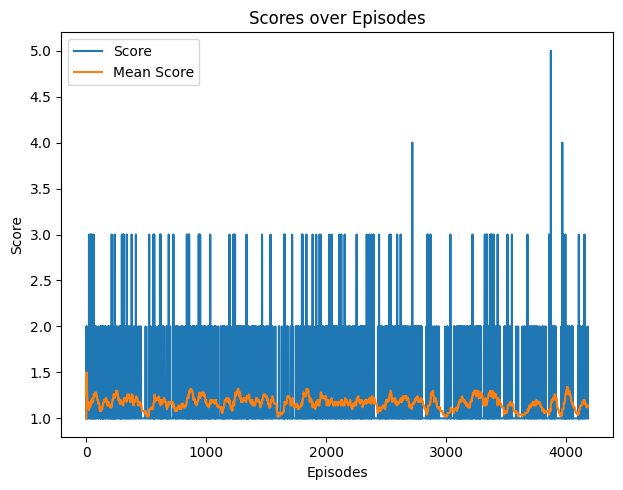

<Figure size 640x480 with 0 Axes>

In [4]:
# Plot Performance Metrics
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Scores over Episodes')
plt.plot(plot_scores, label='Score')
plt.plot(plot_mean_scores, label='Mean Score')
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f'performance_metrics.png')

In [2]:
import dependencias

dqnagentcnn = dependencias.Agentes.DQNAgentCNN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.001,
    learning_rate=0.001,
    input_channels=4,        # Número de canales: 4 (espacio libre, cuerpo, cabeza, comida)
    grid_size=(10, 10),       # Tamaño de la matriz del estado
    n_actions=4,      
    batch_size=64,
    mem_size=10000,
    target_update_freq=100,
    checkpoint_dir='checkpoints'
)
# Inicializar el juego Snake
game = dependencias.Snake_game((10, 10), 1, dqnagentcnn)

In [3]:
n_games = 0
total_score = 0
plot_scores = []
plot_mean_scores = []

In [7]:
episodes = 10000
save_every = 500
import numpy as np
for e in range(0, episodes+1):
    n_games += 1
    state = game.state
    # No aplanar el estado, mantener la forma (canales, height, width)
    state_matrix = state.state_matrix()
    done = False
    
    while not done:
        # Elegir acción
        action_game = dqnagentcnn.get_action(state)
        action_mem = dqnagentcnn.get_action_mem(action_game)
        
        # Realizar acción
        game.state.update(action_game)
        next_state = game.state
        
        # Recompensa
        if game.state.is_game_over:
            reward = -10
        elif game.state.ate_food == True:
            reward = 10
        else:
            reward = 0
        
        # Guardar transición
        next_state_matrix = next_state.state_matrix()
        dqnagentcnn.store_transition(state_matrix, action_mem, reward, next_state_matrix, game.state.is_game_over)
        state_matrix = next_state_matrix
        
        # Entrenar agente
        loss = None
        if len(dqnagentcnn.memory) >= dqnagentcnn.batch_size:
            loss = dqnagentcnn.train()
            
        if game.state.is_game_over:
            # Crear estadísticas para plotearlas.
            score = len(game.state.snake)
            plot_scores.append(score)
            if n_games >= 50:
                mean_score = np.sum(plot_scores[-50:]) / 50
                plot_mean_scores.append(mean_score)
            else:
                total_score += score
                mean_score = total_score / n_games
                plot_mean_scores.append(mean_score)
            
            print(f"Episode: {e}/{episodes}, Score: {score}, Epsilon: {dqnagentcnn.epsilon:.4f}")
            
            # Actualizar epsilon para exploración-explotación.
            dqnagentcnn.update_epsilon()
            
            # Save Checkpoint
            if e % save_every == 0:
                dqnagentcnn.save_checkpoint(e, mean_score)
            
            game.state.reset()
            done = True
            
        if e % 200 == 0:
            game.play_with_pygame()
            dqnagentcnn.epsilon = 0.3 # Reset epsilon para fomentar la exploración durante la visualización


Episode: 0/10000, Score: 2, Epsilon: 0.3000
Checkpoint saved at Episode 0 with Mean Score 1.40


KeyboardInterrupt: 

: 

In [ ]:
import matplotlib.pyplot as plt
from IPython import display

def plot_scores_function(scores, mean_scores):
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    plt.title('Training...')
    plt.xlabel('Number of games')
    plt.ylabel('Score')
    plt.plot(scores, label='Score')
    plt.plot(mean_scores, label='Mean Score')
    plt.legend()
    plt.ylim(ymin=0)
    plt.text(len(scores)-1, scores[-1], str(scores[-1]))
    plt.text(len(mean_scores)-1, mean_scores[-1], str(mean_scores[-1]))
    plt.show()
    plt.savefig(f'performance_metrics.png')

plot_scores_function(plot_scores, plot_mean_scores)